In [16]:
!pip install gensim

In [17]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors


In [18]:
words = [['king'], ['queen'], ['man'], ['woman'], ['paris'], ['france'], ['london'], ['england']]


In [19]:
# Train the Word2Vec model
model = Word2Vec(sentences=words, vector_size=100, window=3, min_count=1, sg=0)

# Save the model for later use (optional)
model.save("word2vec.model")


In [20]:
# Get the vector for a word
king_vector = model.wv['king']
print("Vector for 'king':\n", king_vector)

queen_vector = model.wv['queen']
print("Vector for 'queen':\n", queen_vector)


Vector for 'king':
 [ 8.1681199e-03 -4.4430327e-03  8.9854337e-03  8.2536647e-03
 -4.4352221e-03  3.0310510e-04  4.2744912e-03 -3.9263200e-03
 -5.5599655e-03 -6.5123225e-03 -6.7073823e-04 -2.9592158e-04
  4.4630850e-03 -2.4740540e-03 -1.7260908e-04  2.4618758e-03
  4.8675989e-03 -3.0808449e-05 -6.3394094e-03 -9.2608072e-03
  2.6657581e-05  6.6618943e-03  1.4660227e-03 -8.9665223e-03
 -7.9386048e-03  6.5519023e-03 -3.7856805e-03  6.2549924e-03
 -6.6810320e-03  8.4796622e-03 -6.5163244e-03  3.2880199e-03
 -1.0569858e-03 -6.7875278e-03 -3.2875966e-03 -1.1614120e-03
 -5.4709399e-03 -1.2113475e-03 -7.5633135e-03  2.6466595e-03
  9.0701487e-03 -2.3772502e-03 -9.7651005e-04  3.5135616e-03
  8.6650876e-03 -5.9218528e-03 -6.8875779e-03 -2.9329848e-03
  9.1476962e-03  8.6626766e-04 -8.6784009e-03 -1.4469790e-03
  9.4794659e-03 -7.5494875e-03 -5.3580985e-03  9.3165627e-03
 -8.9737261e-03  3.8259076e-03  6.6544057e-04  6.6607012e-03
  8.3127534e-03 -2.8507852e-03 -3.9923131e-03  8.8979173e-03
  2.

In [21]:
# Find similar words
similar_to_king = model.wv.most_similar('king')
print("\nWords most similar to 'king':\n", similar_to_king)



Words most similar to 'king':
 [('england', 0.09291724115610123), ('queen', 0.00484249135479331), ('france', -0.0027540253940969706), ('paris', -0.013679751195013523), ('woman', -0.028491031378507614), ('man', -0.05774581804871559), ('london', -0.11555545777082443)]


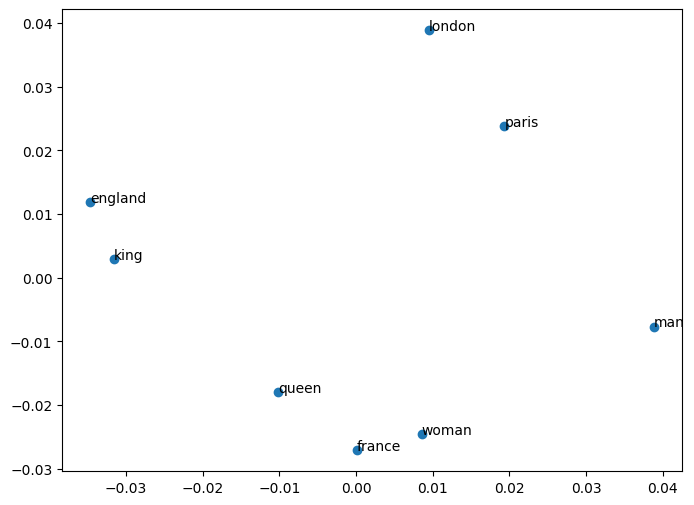

In [22]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce the dimensionality to 2D for visualization
pca = PCA(n_components=2)
words_pca = pca.fit_transform(model.wv[model.wv.key_to_index])

# Plot the 2D representation
plt.figure(figsize=(8, 6))
plt.scatter(words_pca[:, 0], words_pca[:, 1])

for i, word in enumerate(model.wv.key_to_index):
    plt.annotate(word, xy=(words_pca[i, 0], words_pca[i, 1]))

plt.show()
